In [3]:
import pandas as pd
import statsmodels.api as sm

fulldata = pd.read_excel('Documents/Albotherm/29APR25 copy.xlsx')

fulldata.head()

,Column 1,Date of experiment,Aims & Hypothesis,Core used,Core Formulation,Core Viscosity (cP),UV used,UV formulation,UV viscosity (cP),Emulsion viscosity (cP),...,Droplet/particle size (µm),Droplet/particle size range,Droplet/particle size range STDEV,% single core,% empty,Polydispersity Index,% dry after 24h in incubator,% dry after 2 days 70% humidity,Transmission window,Notes
0,AXF0020,2024-07-24,Baseline run,BNC00017,OG (66/27/7),4560.0,BNU00015,AUF69,228.0,476.4,...,43.1,6.5-116.6,20.4,23.80,0.08,0.224030,NaN,NaN,0.03650,NaN
1,AXF0021,2024-07-30,Does removing PEDGA from UV remove the 'wickin...,BNC00022,OG (66/27/7),6180.0,BNU00016,AUF85,260.0,598.8,...,53.3,9.1-136.6,22.5,5.85,0.02,0.178201,0.95,NaN,0.01780,NaN
2,AXF0022,2024-08-02,"Repeat of AXF0021, at smaller scale to create ...",BNC00017,OG (66/27/7),6852.0,BNU00017,AUF85,262.8,598.8,...,45.9,10.5-114.7,19.1,25.50,0.04,0.173158,0.95,NaN,0.03410,NaN
3,AXF0023,2024-08-09,Size screen as a function of dispersed flow rate,BNC00017,OG (66/27/7),6756.0,BNU00018,AUF85,247.2,594.0,...,59.6,18.9-126.5,21.2,23.50,0.00,0.126526,0.80,NaN,0.04165,No nail lamp in cure rig. UV tube lights only
4,AXF0024,2024-08-09,Size screen as a function of dispersed flow rate,BNC00017,OG (66/27/7),6756.0,BNU00018,AUF85,247.2,594.0,...,51.6,24.6-108.8,11.9,47.20,0.00,0.053186,0.60,NaN,0.02100,No nail lamp in cure rig. UV tube lights only


In [5]:
fulldata.isnull().sum()

Column 1                               0
Date of experiment                     0
Aims & Hypothesis                      1
Core used                              0
Core Formulation                       0
Core Viscosity (cP)                    9
UV used                                0
UV formulation                         0
UV viscosity (cP)                      5
Emulsion viscosity (cP)                9
Vessel size (mL)                       0
Impellor                               0
Spin Speed (rpm)                       0
Outer used                             0
Outer viscosity (cP)                   2
Dispersed Flow Rate (mL/min)           0
Continuous Flow Rate (mL/min)          0
Flow Rate Ratio                        0
Cure Rig Used                          0
Length of curing tubing (m)            0
Temperature of Outer Phase           111
UV Power (J s-1)                       1
Curing Energy (kJ g-1)                 1
Droplet/particle size (µm)           111
Droplet/particle

In [17]:
fulldata.notnull().sum()

Column 1                             202
Date of experiment                   202
Aims & Hypothesis                    201
Core used                            202
Core Formulation                     202
Core Viscosity (cP)                  193
UV used                              202
UV formulation                       202
UV viscosity (cP)                    197
Emulsion viscosity (cP)              193
Vessel size (mL)                     202
Impellor                             202
Spin Speed (rpm)                     202
Outer used                           202
Outer viscosity (cP)                 200
Dispersed Flow Rate (mL/min)         202
Continuous Flow Rate (mL/min)        202
Flow Rate Ratio                      202
Cure Rig Used                        202
Length of curing tubing (m)          202
Temperature of Outer Phase            91
UV Power (J s-1)                     201
Curing Energy (kJ g-1)               201
Droplet/particle size (µm)            91
Droplet/particle

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

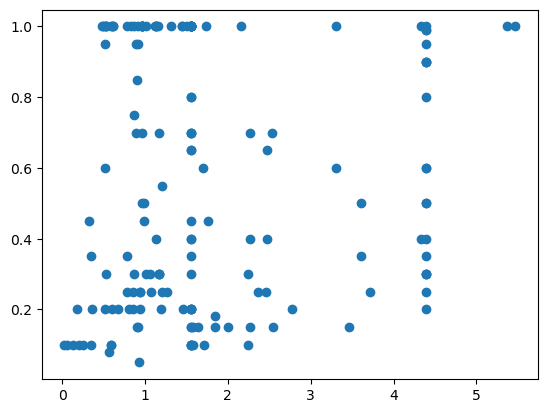

In [85]:
#How cure energy (Column Y(T in new dataset)) affects % dry (Column AI (AB in new dataset))

dataa = fulldata[['Curing Energy (kJ g-1)', '% dry after 2 days 70% humidity']].dropna()
x = dataa['Curing Energy (kJ g-1)'] 
y = dataa['% dry after 2 days 70% humidity']

plt.scatter(x, y)
plt.show()

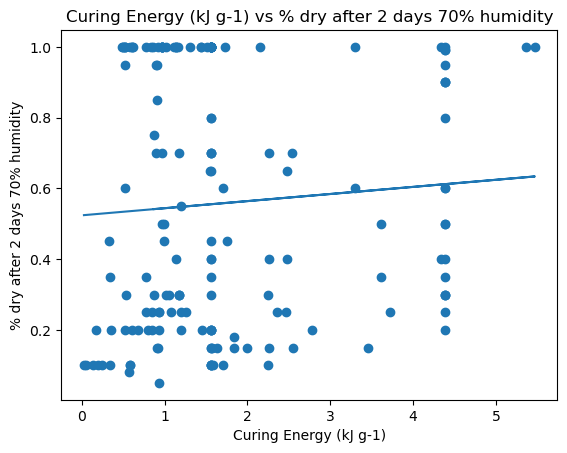

0.07256756234912429
0.02009559284270495


In [87]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title('Curing Energy (kJ g-1) vs % dry after 2 days 70% humidity')
plt.xlabel('Curing Energy (kJ g-1)')
plt.ylabel('% dry after 2 days 70% humidity')
plt.show()

print(r)
print(slope)

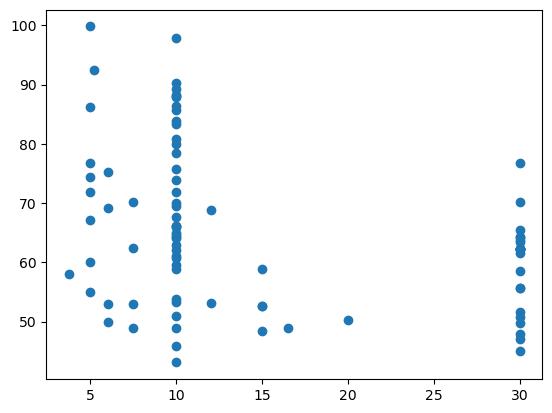

In [135]:
databa = fulldata[['Flow Rate Ratio', 'Droplet/particle size (µm)']].dropna()
cols_to_check = ['Flow Rate Ratio', 'Droplet/particle size (µm)']  #column names

#full dataframe
df_filtered = databa.copy()

#loop through each column
for col in cols_to_check:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    #filter out outliers
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]



x = df_filtered['Flow Rate Ratio'] 
y = df_filtered['Droplet/particle size (µm)']

plt.scatter(x, y)
plt.show()

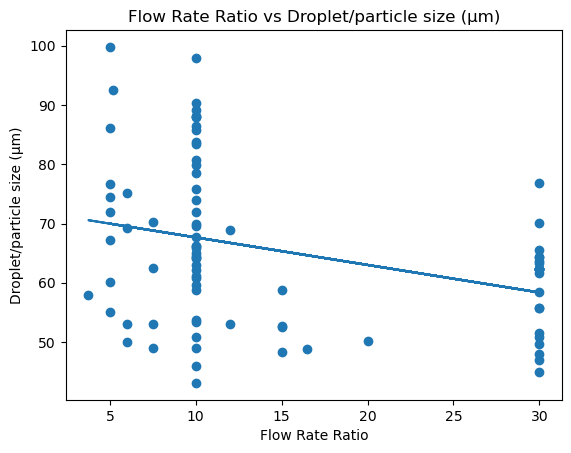

-0.33138104876738145
-0.46457378744660116


In [137]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title('Flow Rate Ratio vs Droplet/particle size (µm)')
plt.xlabel('Flow Rate Ratio')
plt.ylabel('Droplet/particle size (µm)')
plt.show()

print(r)
print(slope)

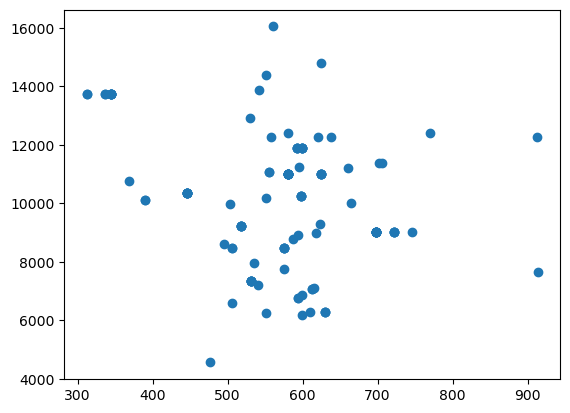

In [133]:
datac = fulldata[['Emulsion viscosity (cP)', 'Core Viscosity (cP)']].dropna()
cols_to_check = ['Emulsion viscosity (cP)', 'Core Viscosity (cP)']  # replace with your column names

# Start with full DataFrame
df_filtered = datac.copy()

# Loop through each column
for col in cols_to_check:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Keep only rows within bounds for this column
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

df_filtered.notnull().sum()

x = df_filtered['Emulsion viscosity (cP)'] 
y = df_filtered['Core Viscosity (cP)']

plt.scatter(x, y)
plt.show()

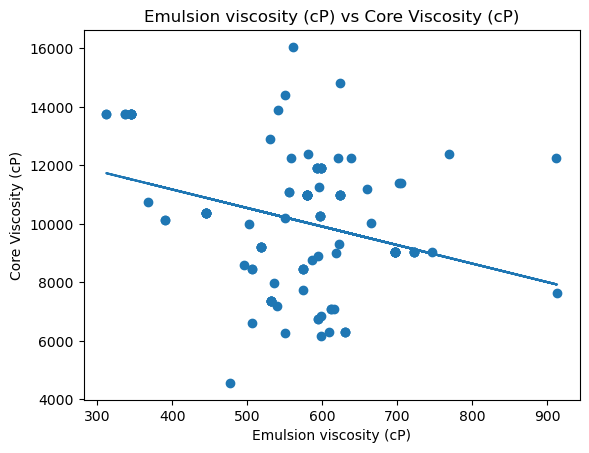

-0.3140386204415574
-6.335712897985875


In [123]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title('Emulsion viscosity (cP) vs Core Viscosity (cP)')
plt.xlabel('Emulsion viscosity (cP)')
plt.ylabel('Core Viscosity (cP)')
plt.show()

print(r)
print(slope)

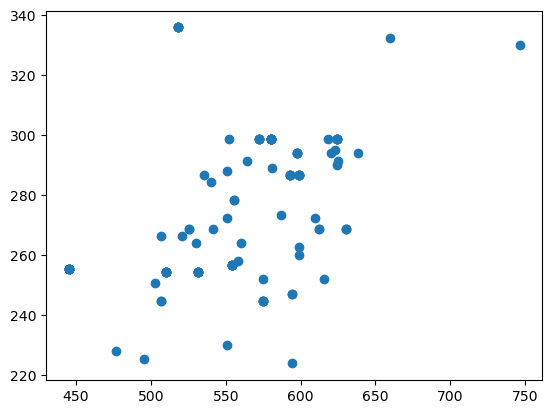

In [125]:
dataca = fulldata[['Emulsion viscosity (cP)', 'UV viscosity (cP)']].dropna()
cols_to_check = ['Emulsion viscosity (cP)', 'UV viscosity (cP)'] #column names

df_filtered = dataca.copy()

# loop through each column
for col in cols_to_check:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # keep data within bounds for this column
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]



x = df_filtered['Emulsion viscosity (cP)'] 
y = df_filtered['UV viscosity (cP)']

plt.scatter(x, y)
plt.show()

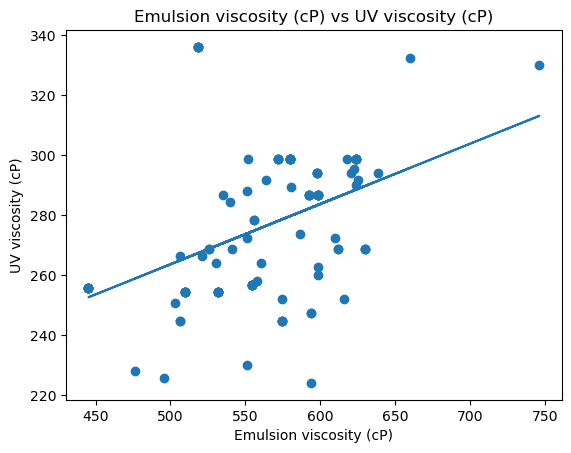

0.4107030927753961
0.20078983932982808


In [127]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title('Emulsion viscosity (cP) vs UV viscosity (cP)')
plt.xlabel('Emulsion viscosity (cP)')
plt.ylabel('UV viscosity (cP)')
plt.show()

print(r)
print(slope)

In [39]:

# Remove missing values 
datab = fulldata[['Flow Rate Ratio', 'Droplet/particle size (µm)']].dropna()
X = datab['Flow Rate Ratio'] 
Y = datab['Droplet/particle size (µm)']

# Add a constant to X (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the results
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Droplet/particle size (µm)   R-squared:                       0.123
Model:                                    OLS   Adj. R-squared:                  0.113
Method:                         Least Squares   F-statistic:                     12.44
Date:                        Tue, 06 May 2025   Prob (F-statistic):           0.000667
Time:                                10:53:41   Log-Likelihood:                -382.05
No. Observations:                          91   AIC:                             768.1
Df Residuals:                              89   BIC:                             773.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

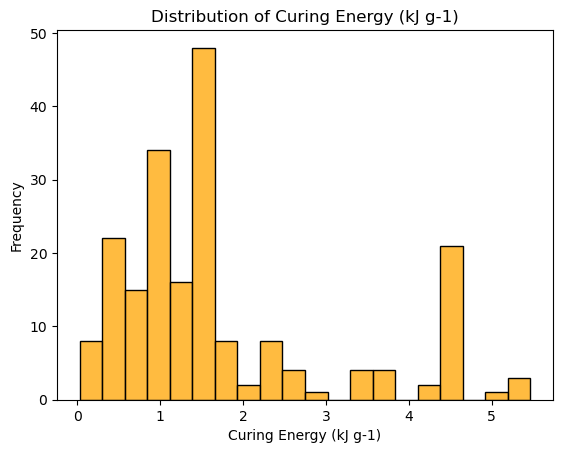

In [49]:
sns.histplot(fulldata['Curing Energy (kJ g-1)'].dropna(), bins=20, color='orange')
plt.title('Distribution of Curing Energy (kJ g-1)')
plt.xlabel('Curing Energy (kJ g-1)')
plt.ylabel('Frequency')
plt.show()

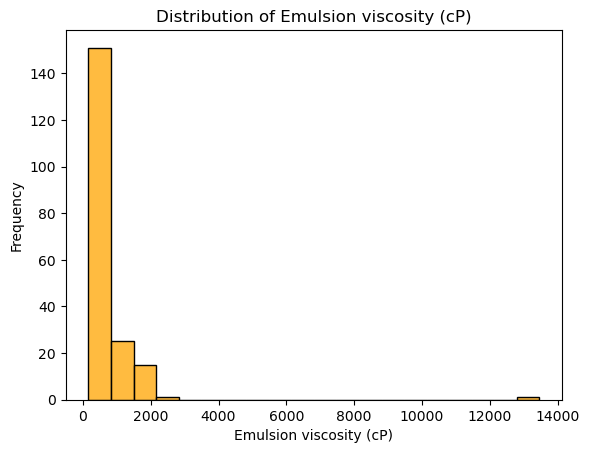

In [51]:
sns.histplot(fulldata['Emulsion viscosity (cP)'].dropna(), bins=20, color='orange')
plt.title('Distribution of Emulsion viscosity (cP)')
plt.xlabel('Emulsion viscosity (cP)')
plt.ylabel('Frequency')
plt.show()

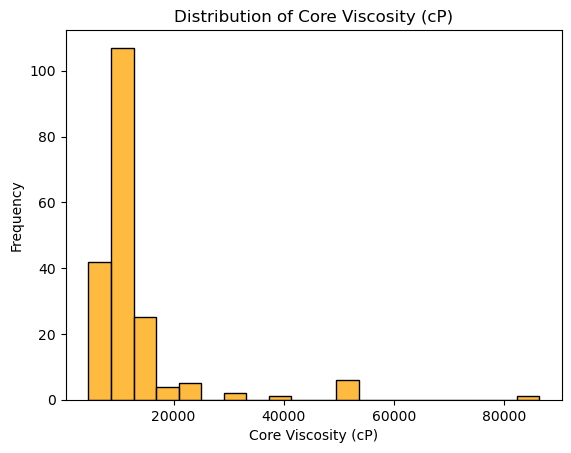

In [53]:
sns.histplot(fulldata['Core Viscosity (cP)'].dropna(), bins=20, color='orange')
plt.title('Distribution of Core Viscosity (cP)')
plt.xlabel('Core Viscosity (cP)')
plt.ylabel('Frequency')
plt.show()

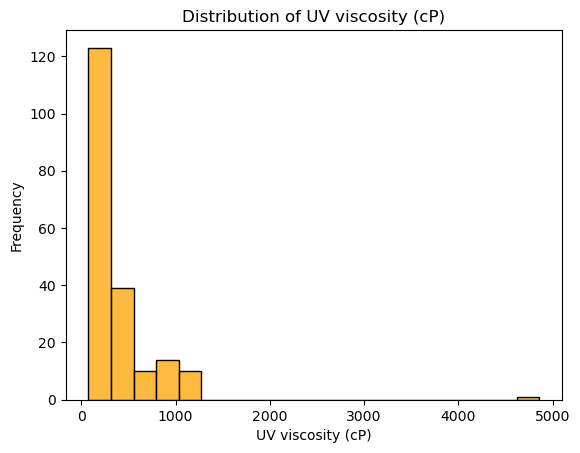

In [55]:
sns.histplot(fulldata['UV viscosity (cP)'].dropna(), bins=20, color='orange')
plt.title('Distribution of UV viscosity (cP)')
plt.xlabel('UV viscosity (cP)')
plt.ylabel('Frequency')
plt.show()

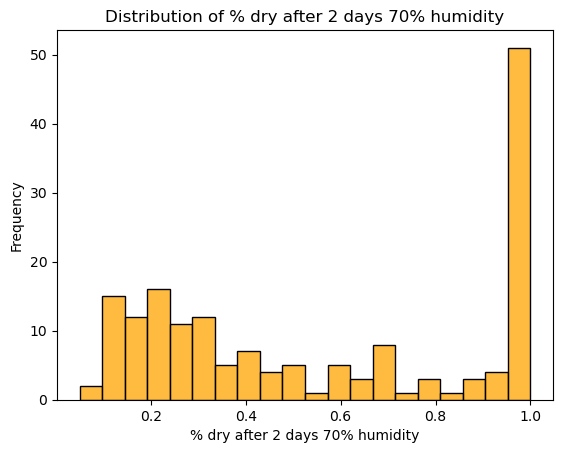

In [65]:
sns.histplot(fulldata['% dry after 2 days 70% humidity'].dropna(), bins=20, color='orange')
plt.title('Distribution of % dry after 2 days 70% humidity')
plt.xlabel('% dry after 2 days 70% humidity')
plt.ylabel('Frequency')
plt.show()

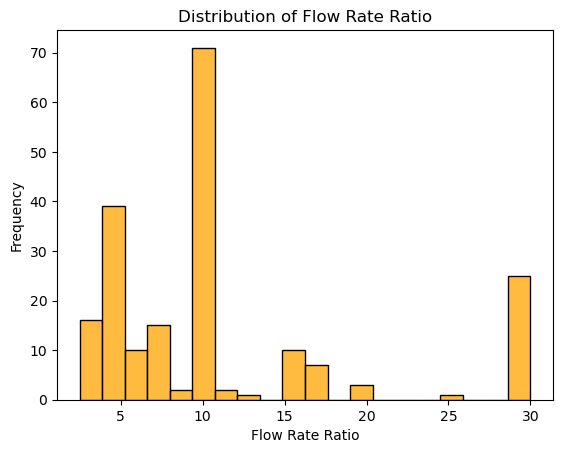

In [63]:
sns.histplot(fulldata['Flow Rate Ratio'].dropna(), bins=20, color='orange')
plt.title('Distribution of Flow Rate Ratio')
plt.xlabel('Flow Rate Ratio')
plt.ylabel('Frequency')
plt.show()

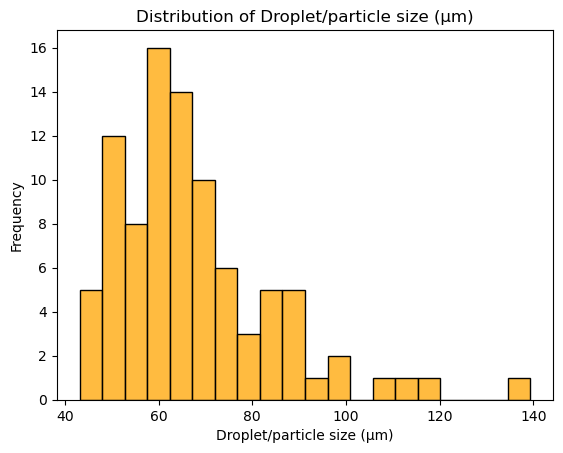

In [61]:
sns.histplot(fulldata['Droplet/particle size (µm)'].dropna(), bins=20, color='orange')
plt.title('Distribution of Droplet/particle size (µm)')
plt.xlabel('Droplet/particle size (µm)')
plt.ylabel('Frequency')
plt.show()